In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Number of experiments
N_exp = 10000

# --- CONSTANT MODEL ---
# For each experiment, sample two training points uniformly in [-1,1]
np.random.seed(42)
x_train = np.random.uniform(-1, 1, (N_exp, 2))
y_train = np.sin(np.pi * x_train)

In [ ]:
y_train

array([[-0.70914702,  0.30474544],
       [ 0.99360701,  0.58094525],
       [-0.83066112, -0.83057673],
       ...,
       [ 0.58249388,  0.69799163],
       [-0.28991763, -0.94361939],
       [-0.34865053, -0.8830732 ]])

In [ ]:
# The best constant fit is the average of the two f(x) values:
# b = (y1 + y2)/2
b_const = np.mean(y_train, axis=1)

# The average hypothesis (over experiments) is:
mean_b_const = np.mean(b_const,)

In [ ]:
# Variance of the constant model (over experiments, note: independent of x)
var_const = np.var(b_const)

# To compute bias^2, evaluate over a grid of x values:
x_grid = np.linspace(-1, 1, N_exp)
f_x = np.sin(np.pi * x_grid)
# To make g(x) has same shape with f(x)
g_const = mean_b_const * np.ones_like(x_grid)
# Bias^2 at each x:
bias2_const_grid = (g_const - f_x) ** 2
# Average bias^2 over x:
bias2_const = np.mean(bias2_const_grid)

In [ ]:
# --- LINEAR MODEL ---
# For each experiment, use the same training sets
x1 = x_train[:, 0]
x2 = x_train[:, 1]
y1 = np.sin(np.pi * x1)
y2 = np.sin(np.pi * x2)


In [ ]:
# Compute slope and intercept for each experiment
m_linear = (y2 - y1) / (x2 - x1) # slope
b_linear = y1 - m_linear * x1 # intercept

In [ ]:
# Average hypothesis: average slope and intercept:
mean_m_linear = np.mean(m_linear)
mean_b_linear = np.mean(b_linear)

In [ ]:
# For each x in the grid, compute each experiment's prediction:
# Shape: (N_exp, len(x_grid))
g_linear_all = m_linear.reshape(-1, 1) * x_grid + b_linear.reshape(-1, 1)
# Average hypothesis over experiments:
g_linear_mean = np.mean(g_linear_all, axis=0)

In [ ]:
b_linear.reshape(-1, 1)

array([[-0.48837554],
       [ 0.27560574],
       [-2.03416139],
       ...,
       [ 2.51246461],
       [-1.44315382],
       [-0.23689811]])

In [ ]:
g_linear_mean

array([-0.78846042, -0.78830441, -0.78814839, ...,  0.77119285,
        0.77134887,  0.77150488])

In [ ]:
# Variance at each x:
var_linear_grid = np.mean((g_linear_all - g_linear_mean.reshape(1, -1))**2, axis=0)
# Average variance over x:
var_linear = np.mean(var_linear_grid)

In [ ]:
# Bias^2 at each x:
bias2_linear_grid = (g_linear_mean - f_x)**2
# Average bias^2 over x:
bias2_linear = np.mean(bias2_linear_grid)

In [ ]:
# --- Report Results ---
print("Constant Model Results:")
print("  Average hypothesis: g(x) = {:.3f}".format(mean_b_const))
print("  Bias^2 (average over x): {:.3f}".format(bias2_const))
print("  Variance: {:.3f}".format(var_const))
print("  Total error (bias^2 + variance): {:.3f}".format(bias2_const + var_const))
print("")
print("Linear Model Results:")
print("  Average hypothesis: g(x) = {:.3f}x + {:.3f}".format(mean_m_linear, mean_b_linear))
print("  Bias^2 (average over x): {:.3f}".format(bias2_linear))
print("  Variance (average over x): {:.3f}".format(var_linear))
print("  Total error (bias^2 + variance): {:.3f}".format(bias2_linear + var_linear))


Constant Model Results:
  Average hypothesis: g(x) = -0.002
  Bias^2 (average over x): 0.500
  Variance: 0.251
  Total error (bias^2 + variance): 0.751

Linear Model Results:
  Average hypothesis: g(x) = 0.780x + -0.008
  Bias^2 (average over x): 0.206
  Variance (average over x): 1.656
  Total error (bias^2 + variance): 1.862


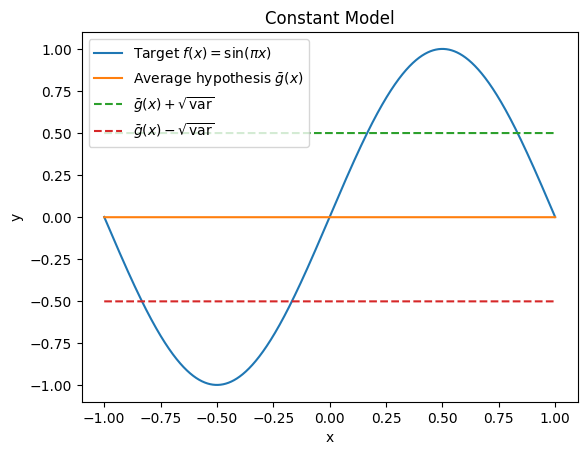

In [ ]:
# --- Plotting ---
# Plot for Constant Model
plt.figure()
plt.plot(x_grid, f_x, label=r'Target $f(x)=\sin(\pi x)$')
plt.plot(x_grid, g_const, label=r'Average hypothesis $\bar{g}(x)$')
plt.plot(x_grid, g_const + np.sqrt(var_const), '--', label=r'$\bar{g}(x)+\sqrt{\mathrm{var}}$')
plt.plot(x_grid, g_const - np.sqrt(var_const), '--', label=r'$\bar{g}(x)-\sqrt{\mathrm{var}}$')
plt.title('Constant Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

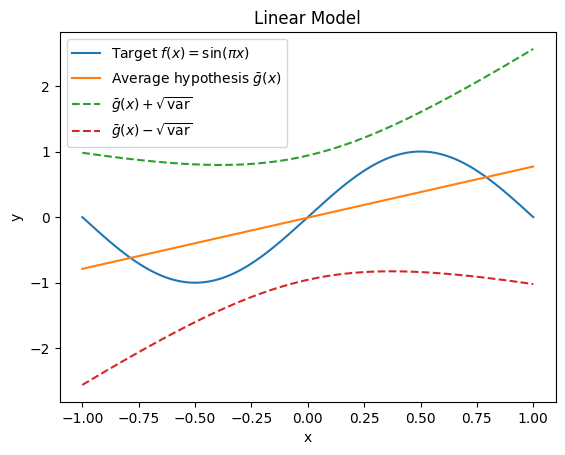

In [ ]:
# Plot for Linear Model
plt.figure()
plt.plot(x_grid, f_x, label=r'Target $f(x)=\sin(\pi x)$')
plt.plot(x_grid, g_linear_mean, label=r'Average hypothesis $\bar{g}(x)$')
plt.plot(x_grid, g_linear_mean + np.sqrt(var_linear_grid), '--', label=r'$\bar{g}(x)+\sqrt{\mathrm{var}}$')
plt.plot(x_grid, g_linear_mean - np.sqrt(var_linear_grid), '--', label=r'$\bar{g}(x)-\sqrt{\mathrm{var}}$')
plt.title('Linear Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The constant model has a total error of 0.751 and the linear model has a total error of 1.862. I would choose the constant model because the constant model has a lower total error than the linear model.